In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import keras  # pip install keras
import cv2    # pip install opencv-python
from matplotlib import pyplot as plt
import random
import os
from PIL import Image



In [4]:
# Read CSV file
df = pd.read_csv("train.csv")
base_path =".\\images\\"

In [5]:
df

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474
...,...,...,...
4132909,fc0f007893b11ba7,https://upload.wikimedia.org/wikipedia/commons...,172138
4132910,39aad18585867916,https://upload.wikimedia.org/wikipedia/commons...,162860
4132911,fd0725460e4ebbec,https://upload.wikimedia.org/wikipedia/commons...,191243
4132912,73691ae29e24ba19,https://upload.wikimedia.org/wikipedia/commons...,145760


In [6]:
samples = 20000
df=df.loc[df["id"].str.startswith('000',na=False), :]
num_classes = len(df["landmark_id"].unique())
num_data=len(df)


In [5]:
num_classes

959

In [6]:
num_data

973

In [7]:
# Convert value_counts into a DataFrame
data = pd.DataFrame(df["landmark_id"].value_counts())
data.reset_index(inplace=True)
data.head()


,landmark_id,count
0,119585,2
1,40530,2
2,20120,2
3,99759,2
4,198657,2


In [8]:
print(df.columns)


Index(['id', 'url', 'landmark_id'], dtype='object')


In [9]:
data.tail()


,landmark_id,count
954,81717,1
955,4206,1
956,50255,1
957,126637,1
958,193078,1


In [10]:
data['landmark_id'].describe()

count       959.000000
mean     102855.625652
std       59718.158037
min         136.000000
25%       48303.500000
50%      104088.000000
75%      157240.500000
max      203073.000000
Name: landmark_id, dtype: float64

(array([  0.,   0., 945.,   0.,  14.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23

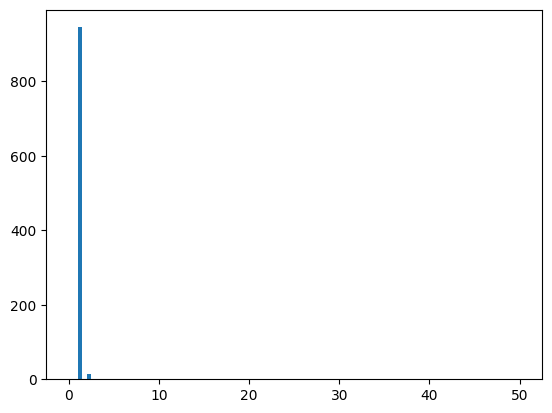

In [11]:
plt.hist(data['count'],100, range =(0,50), label='test')

In [12]:
data['count'].between(0,5).sum()


959

In [13]:
data['count'].between(5,10).sum()

0

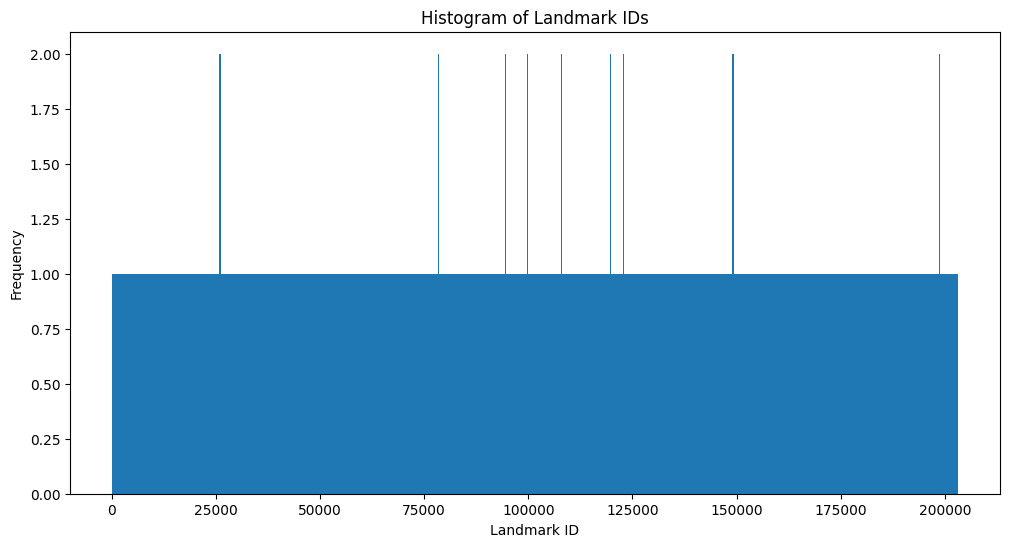

In [14]:
plt.figure(figsize=(12,6))
plt.hist(df["landmark_id"], bins=sorted(df["landmark_id"].unique()))
plt.xlabel("Landmark ID")
plt.ylabel("Frequency")
plt.title("Histogram of Landmark IDs")
plt.show()


In [15]:
#training of a model
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [16]:
df.head()

,id,url,landmark_id
4209,000235ce813517a1,https://upload.wikimedia.org/wikipedia/commons...,120911
11174,000b226dbc297197,https://upload.wikimedia.org/wikipedia/commons...,197802
23686,000949bb3b6480cb,https://upload.wikimedia.org/wikipedia/commons...,60384
24410,0009a3f520a07e16,https://upload.wikimedia.org/wikipedia/commons...,181490
26635,000956cf141171cd,https://upload.wikimedia.org/wikipedia/commons...,83553


In [17]:
def encode_label(lbl):
    return lencoder.transform(lbl)
    
    

In [18]:
def decode_label(lbl):
    return lencoder.inverse_transform(lbl)


In [19]:
# def get_image_from_number(num): fname, label = df.loc[num, :] fname = fname + '.jpg' f1 = fname[0] f2 = fname[1] f3 = fname[2] path = os.path.join(f1, f2, f3, fname) im = cv2.imread(os.path.join(base_path, path)) return im, label

In [20]:
def get_image_from_number(idx, dataframe=df):
    fname, label = dataframe.iloc[idx][['id','landmark_id']]
    fname = fname + '.jpg'
    f1, f2, f3 = fname[0], fname[1], fname[2]
    path = os.path.join(base_path, f1, f2, f3, fname)
    im = cv2.imread(path)
    return im, label



4 sample images from random classes


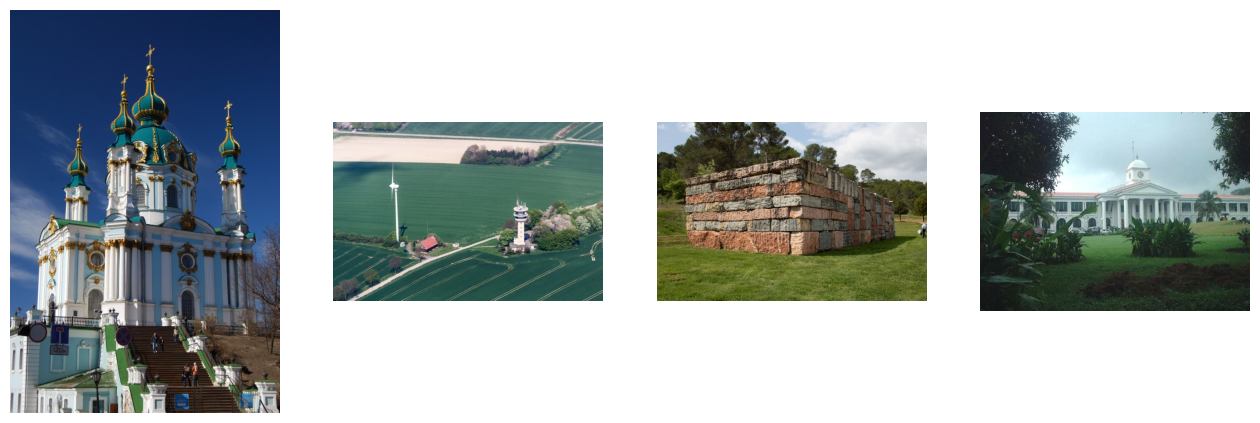

In [21]:
print("4 sample images from random classes")
fig = plt.figure(figsize=(16,16))
for i in range(1,5):
    ri = random.choices(os.listdir(base_path),k=3)
    folder = base_path + '/' + ri[0] + '/' +ri[1] + '/' +ri[2]
    random_img=random.choice(os.listdir(folder))
    img=np.array(Image.open(folder+'/'+random_img))
    fig.add_subplot(1,4,i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [ ]:
ri

In [40]:
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras.models import Sequential
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [41]:
learning_rate = 0.0001
decay_speed = 1e-6
loss_function = "sparse_categorical_crossentropy"
momentum=0.09
source_model= VGG19(weights=None)
drop_layer1=Dropout(0.5)
drop_layer2=Dropout(0.5)

In [42]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())  
    model.add(layer)
model.add(Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,8

 Total params: 139,771,005 (533.18 MB)

 Trainable params: 139,770,999 (533.18 MB)

 Non-trainable params: 6 (24.00 B)

In [43]:
from keras.optimizers import RMSprop

optim1 = RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optim1,
              loss=loss_function,
              metrics=["accuracy"])


In [44]:
def image_reshape(ig, target_size):
    return cv2.resize(ig, target_size)

In [45]:
def get_batch(dataframe, start, batch_size):
    batch = dataframe.iloc[start:start+batch_size]
    
    image_array, labels = [], []

    folder_path = "./images/0/0/0"
    list_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        
    for _, row in batch.iterrows():
        fname = row['id'] + ".jpg"
        path = os.path.join(base_path, "0", "0", "0", fname)

        im = cv2.imread(path)
        if im is None:
            print(f"⚠️ Could not read image: {path}")
            continue

        im = cv2.resize(im, (224, 224)) / 255.0
        image_array.append(im)
        
        # Encode landmark_id
        label = lencoder.transform([row['landmark_id']])[0]
        labels.append(label)

    return np.array(image_array), np.array(labels)


In [46]:
batch_size=16
epoch_shuffle=True
weight_classes=True
epochs=1

#split
train,val=np.split(df.sample(frac=1,random_state=42),[int(0.8*len(df))])
print(len(train))
print(len(val))

C:\Users\Betina Kuriakose\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


3306331
826583


In [91]:
for e in range(epochs):
    print(f"Epoch: {e+1}/{epochs}")
    
    if epoch_shuffle:
        train = train.sample(frac=1).reset_index(drop=True)
    
    for lt in range(int(np.ceil(len(train)/batch_size))):
        x_train, y_train = get_batch(train, lt*batch_size, batch_size)
        
        # Train on batch directly; no NumPy ops on symbolic tensors
        model.train_on_batch(x_train, y_train)

model.save("Model")


Epoch: 1/1
⚠️ Could not read image: .\images\0\0\0\00ad597129b5736f.jpg
⚠️ Could not read image: .\images\0\0\0\00dd20f84d140999.jpg
⚠️ Could not read image: .\images\0\0\0\00bfe76d006590d6.jpg
⚠️ Could not read image: .\images\0\0\0\004cee637c6983b7.jpg
⚠️ Could not read image: .\images\0\0\0\0097746c20e0aa0a.jpg
⚠️ Could not read image: .\images\0\0\0\00371a6da88c7683.jpg
⚠️ Could not read image: .\images\0\0\0\00c130f2bc06ba5a.jpg
⚠️ Could not read image: .\images\0\0\0\003b237ab84cf720.jpg
⚠️ Could not read image: .\images\0\0\0\00a95fe2db465e00.jpg
⚠️ Could not read image: .\images\0\0\0\0019e00286644617.jpg
⚠️ Could not read image: .\images\0\0\0\008aa3a3ed40f354.jpg
⚠️ Could not read image: .\images\0\0\0\004fdd1de344f274.jpg
⚠️ Could not read image: .\images\0\0\0\00957d0c37f1d931.jpg
⚠️ Could not read image: .\images\0\0\0\0022c9fa7352b5c7.jpg
⚠️ Could not read image: .\images\0\0\0\00a659119b9b7069.jpg


NotImplementedError: Cannot convert a symbolic tf.Tensor (StatefulPartitionedCall_4:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.

In [46]:
print(train.columns)
print(train.head())


Index(['id', 'url', 'landmark_id'], dtype='object')
                 id                                                url  \
0  00e336e67d4bc20a  https://upload.wikimedia.org/wikipedia/commons...   
1  00126f4922b58daa  https://upload.wikimedia.org/wikipedia/commons...   
2  007b94987206eadb  http://upload.wikimedia.org/wikipedia/commons/...   
3  0027b34d5fd96c47  https://upload.wikimedia.org/wikipedia/commons...   
4  00a849bb5beef45d  https://upload.wikimedia.org/wikipedia/commons...   

   landmark_id  
0        25202  
1       117697  
2       122849  
3       148906  
4       160960  


In [33]:
batch_size = 16
errors = 0
good_preds = []
bad_preds = []

for it in range(int(np.ceil(len(val) / batch_size))):
    X_val, y_val = get_batch(val, it * batch_size, batch_size)

    preds = model.predict(X_val)
    cla = np.argmax(preds, axis=1)

    for idx, res in enumerate(preds):
        if cla[idx] != y_val[idx]:
            errors += 1
            bad_preds.append([it*batch_size + idx, cla[idx], res[cla[idx]]])
        else:
            good_preds.append([it*batch_size + idx, cla[idx], res[cla[idx]]])

print(f"Validation errors: {errors}")
print(f"Good predictions: {len(good_preds)}")


KeyError: 0